In [2]:
import pandas as pd
import numpy as np


In [3]:
train_df = pd.read_csv('train.csv')
train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df[['Pclass', 'Sex', 'Embarked']].head()


,Pclass,Sex,Embarked
0,3,male,S
1,1,female,C
2,3,female,S
3,1,female,S
4,3,male,S


In [5]:
test_df = pd.read_csv('test.csv')
test_df.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
test_df[['Pclass', 'Sex', 'Embarked']].head()


,Pclass,Sex,Embarked
0,3,male,Q
1,3,female,S
2,2,male,Q
3,3,male,S
4,3,female,S


In [7]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
train_df['Embarked'] = train_df['Embarked'].fillna('S')
train_df['Cabin'] = train_df['Cabin'].str[0]  # 객실번호 지우고 알파벳만 남기기
train_df['Cabin'] = train_df['Cabin'].fillna('C')

test_df['Age'] = test_df['Age'].fillna(test_df['Age'].median())
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].median())
test_df['Cabin'] = test_df['Cabin'].str[0]  # 객실번호 지우고 알파벳만 남기기
test_df['Cabin'] = test_df['Cabin'].fillna('C')


In [10]:
train_df['Family'] = train_df['SibSp']+train_df['Parch']+1
test_df['Family'] = test_df['SibSp']+test_df['Parch']+1


In [11]:
train_df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,C,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,C,S,4
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,C,1


In [12]:
test_df


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,C,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,C,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,C,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,C,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,C,S,3
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,27.0,0,0,A.5. 3236,8.0500,C,S,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,C,S,1
416,1308,3,"Ware, Mr. Frederick",male,27.0,0,0,359309,8.0500,C,S,1


In [13]:
# 문자를 숫자로 변환
# train_df.loc[train_df['Cabin'] == 'C', 'Cabin'] = 0
# train_df.loc[train_df['Cabin'] == 'B', 'Cabin'] = 1

train_df['Cabin'] = train_df['Cabin'].map({
    'C': 0,
    'B': 1,
    'D': 2,
    'E': 3,
    'A': 4,
    'F': 5,
    'G': 6,
    'T': 7
})
train_df['Embarked'] = train_df['Embarked'].map({
    'S': 0,
    'C': 1,
    'Q': 2
})
train_df['Sex'] = train_df['Sex'].map({
    'male': 0,
    'female': 1
})


test_df['Cabin'] = test_df['Cabin'].map({
    'C': 0,
    'B': 1,
    'D': 2,
    'E': 3,
    'A': 4,
    'F': 5,
    'G': 6,
    'T': 7
})
test_df['Embarked'] = test_df['Embarked'].map({
    'S': 0,
    'C': 1,
    'Q': 2
})
test_df['Sex'] = test_df['Sex'].map({
    'male': 0,
    'female': 1
})


In [14]:
train_df['Cabin'].value_counts()


0    746
1     47
2     33
3     32
4     15
5     13
6      4
7      1
Name: Cabin, dtype: int64

In [15]:
test_df['Cabin'].value_counts()


0    362
1     18
2     13
3      9
5      8
4      7
6      1
Name: Cabin, dtype: int64

In [16]:
train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,0,1,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,0,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,0,1


In [17]:
test_df.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,0,2,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,0,0,2
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,0,2,1
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,0,0,3


In [18]:
train = train_df.drop(
    ['Name', 'Ticket', 'SibSp', 'Parch', 'PassengerId'], axis=1)
train.head()


,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Family
0,0,3,0,22.0,7.2500,0,0,2
1,1,1,1,38.0,71.2833,0,1,2
2,1,3,1,26.0,7.9250,0,0,1
3,1,1,1,35.0,53.1000,0,0,2
4,0,3,0,35.0,8.0500,0,0,1


In [19]:
test = test_df.drop(
    ['Name', 'Ticket', 'SibSp', 'Parch', 'PassengerId'], axis=1)
test.head()


,Pclass,Sex,Age,Fare,Cabin,Embarked,Family
0,3,0,34.5,7.8292,0,2,1
1,3,1,47.0,7.0000,0,0,2
2,2,0,62.0,9.6875,0,2,1
3,3,0,27.0,8.6625,0,0,1
4,3,1,22.0,12.2875,0,0,3


In [20]:
# 모델의 학습에 사용되는 데이터 : Training set
# 모델 제작 과정 중, 학습된 모델의 성능을 측정하기 위한 데이터 : Validation set
# 모델의 최종 성능을 평가하기 위한 데이터 : Test set

In [21]:
# 훈련용 데이터에서 data, label(target) 분리
train_data = train.drop('Survived', axis=1)  # 학습용 데이터
target_data = train['Survived']  # 학습용 데이터의 label(target)


In [22]:
from sklearn.model_selection import train_test_split

# y는 정답
x_train, x_valid, y_train, y_valid = train_test_split(train_data, target_data)
print(train_data.shape, x_train.shape, x_valid.shape)


(891, 7) (668, 7) (223, 7)


In [23]:
# DecisionTreeClassifier를 사용하여 학습
from sklearn.tree import DecisionTreeClassifier

# DecisionTree로 모델 생성
tree_dec = DecisionTreeClassifier()

# 학습
tree_dec.fit(x_train, y_train)


DecisionTreeClassifier()

In [24]:
print('training set accuracy :', tree_dec.score(x_train, y_train))
print('validation set accuracy :', tree_dec.score(x_valid, y_valid))


training set accuracy : 0.9850299401197605
validation set accuracy : 0.7847533632286996


In [25]:
# 만들어진 DecisionTree로 test data 판단
prediction = tree_dec.predict(test)

In [26]:
submit = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': prediction
})
submit.to_csv('survived.csv', index=False)


In [27]:
my_prediction = pd.read_csv('survived.csv')
my_prediction.head()


,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,0
4,896,1


[Text(576.2559267241379, 849.0514285714286, 'Sex <= 0.5\ngini = 0.471\nsamples = 668\nvalue = [414, 254]\nclass = Unsurvived'),
 Text(271.5506465517241, 807.6342857142857, 'Age <= 9.5\ngini = 0.297\nsamples = 430\nvalue = [352, 78]\nclass = Unsurvived'),
 Text(143.24137931034483, 766.2171428571428, 'Family <= 4.5\ngini = 0.469\nsamples = 24\nvalue = [9, 15]\nclass = Survived'),
 Text(134.68965517241378, 724.8, 'gini = 0.0\nsamples = 15\nvalue = [0, 15]\nclass = Survived'),
 Text(151.79310344827584, 724.8, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]\nclass = Unsurvived'),
 Text(399.85991379310343, 766.2171428571428, 'Pclass <= 1.5\ngini = 0.262\nsamples = 406\nvalue = [343, 63]\nclass = Unsurvived'),
 Text(168.8965517241379, 724.8, 'Age <= 51.5\ngini = 0.452\nsamples = 90\nvalue = [59, 31]\nclass = Unsurvived'),
 Text(98.34482758620689, 683.3828571428571, 'Fare <= 26.144\ngini = 0.48\nsamples = 70\nvalue = [42, 28]\nclass = Unsurvived'),
 Text(89.79310344827586, 641.9657142857143, 'gini = 

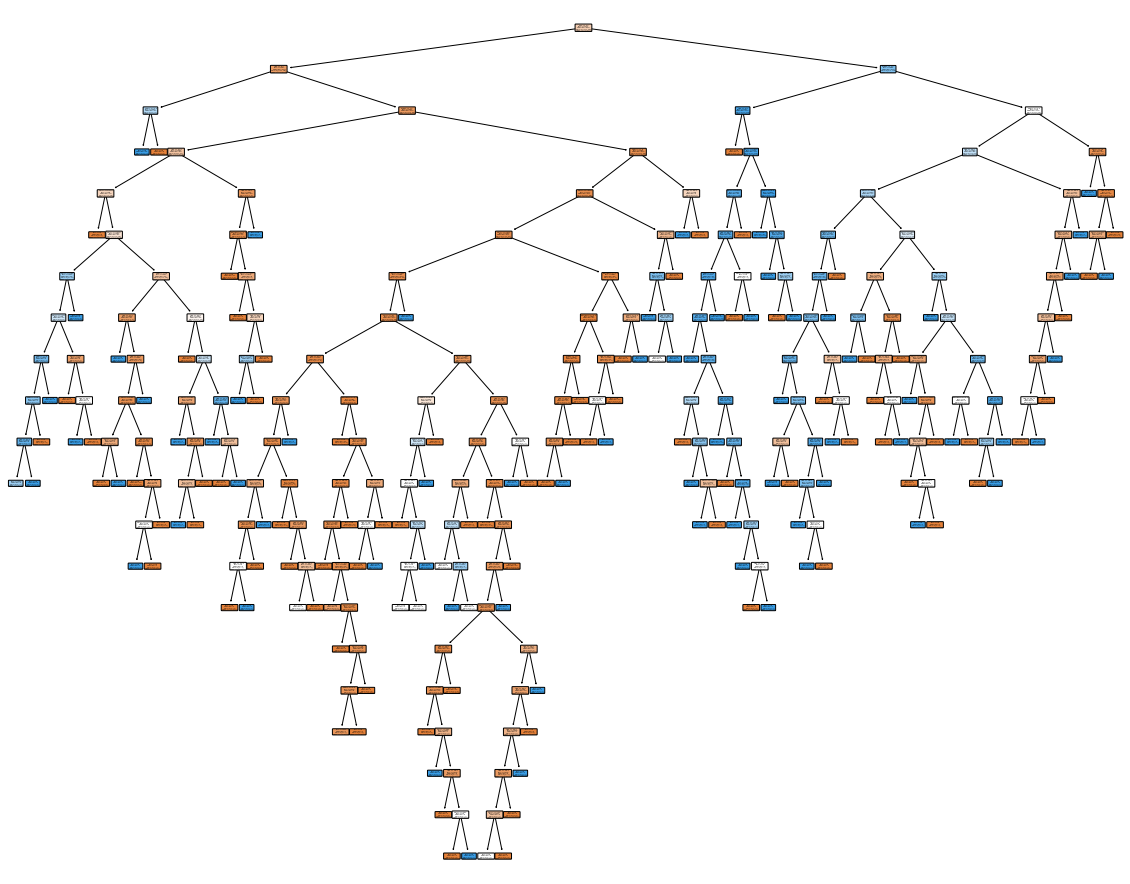

In [28]:
# 시각화
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 16))
feature_name = ['Pclass', 'Sex', 'Age', 'Fare', 'Cabin', 'Embarked', 'Family']
tree.plot_tree(tree_dec, class_names=['Unsurvived', 'Survived'],
               feature_names=feature_name, impurity=True, filled=True, rounded=True)


In [29]:
print('숫자가 클수록 중요도가 크다.')
for name, value in zip(feature_name, tree_dec.feature_importances_):
    print('{0}: {1:.3f}'.format(name, value))


숫자가 클수록 중요도가 크다.
Pclass: 0.100
Sex: 0.315
Age: 0.257
Fare: 0.213
Cabin: 0.019
Embarked: 0.011
Family: 0.086
